In [1]:
# Importing the pandas library and aliasing it as pd for convenience
import pandas as pd

In [2]:
# Displaying the first few rows of the DataFrame using the head() method
train = pd.read_csv("Customer Churn.csv")
train.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [3]:
# Importing the Matplotlib library and aliasing it as plt for convenience
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Assuming 'train' is a pandas DataFrame
train.info

<bound method DataFrame.info of       Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71     

In [5]:
# Displaying the shape of the DataFrame
train.shape

(3150, 14)

In [6]:
# Displaying the sum of missing values for each column
train.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [7]:
train.dtypes

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

In [8]:
# check unique values in dataset
train.apply(lambda x: len(x.unique()))

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
Churn                         2
dtype: int64

In [9]:
# check for categorical attributes
cat_col = []
for x in train.dtypes.index:
    if train.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

[]

In [10]:
import missingno as msno

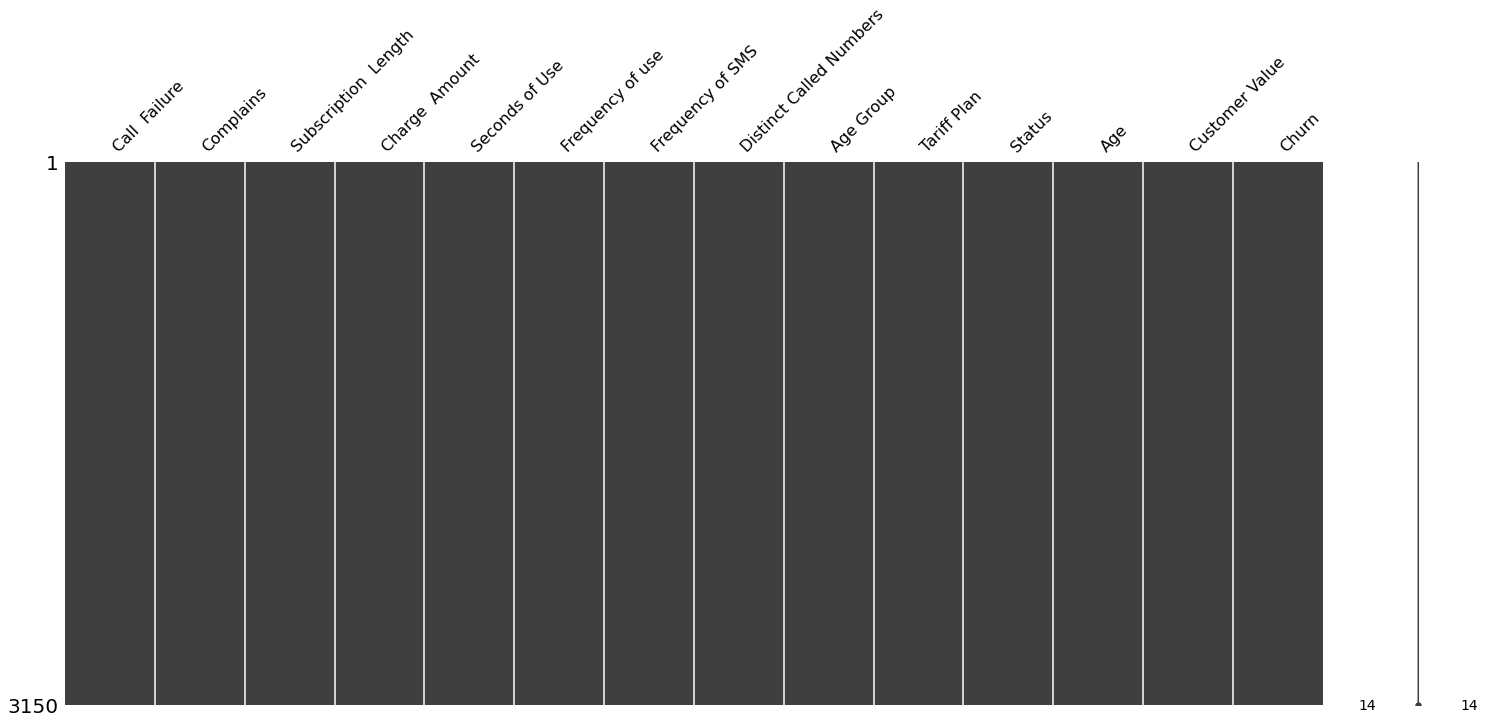

<Figure size 1080x648 with 0 Axes>

In [11]:
# Using missingno library to create a matrix visualization of missing values in 'train'
# Adjusting the size of the plot using Matplotlib
msno.matrix(train)
plt.figure(figsize = (15,9))
plt.show()

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Call  Failure', ylabel='count'>

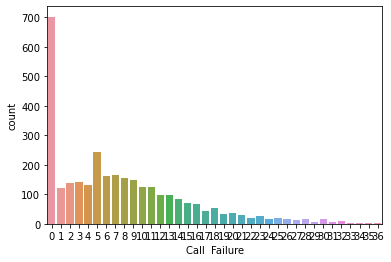

In [13]:
sns.countplot(train["Call  Failure"])

<AxesSubplot:xlabel='Complains', ylabel='count'>

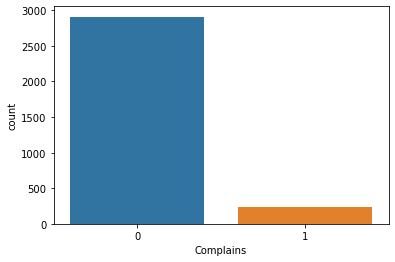

In [14]:
sns.countplot(train["Complains"])

<AxesSubplot:xlabel='Subscription  Length', ylabel='count'>

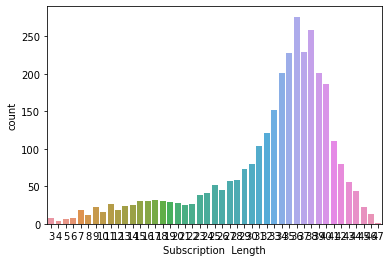

In [15]:
sns.countplot(train["Subscription  Length"])

<AxesSubplot:xlabel='Charge  Amount', ylabel='count'>

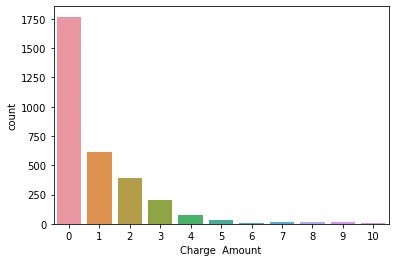

In [16]:
sns.countplot(train["Charge  Amount"])

<AxesSubplot:xlabel='Seconds of Use', ylabel='count'>

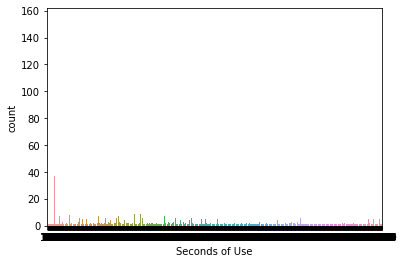

In [17]:
sns.countplot(train["Seconds of Use"])

<AxesSubplot:xlabel='Frequency of use', ylabel='count'>

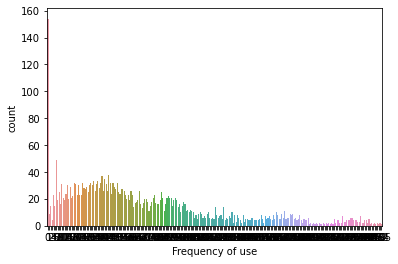

In [18]:
sns.countplot(train["Frequency of use"])

<AxesSubplot:xlabel='Frequency of SMS', ylabel='count'>

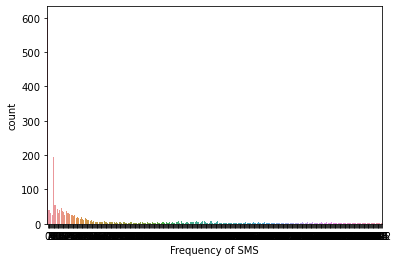

In [19]:
sns.countplot(train["Frequency of SMS"])

<AxesSubplot:xlabel='Distinct Called Numbers', ylabel='count'>

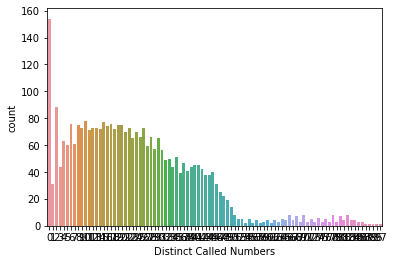

In [20]:
sns.countplot(train["Distinct Called Numbers"])

<AxesSubplot:xlabel='Age Group', ylabel='count'>

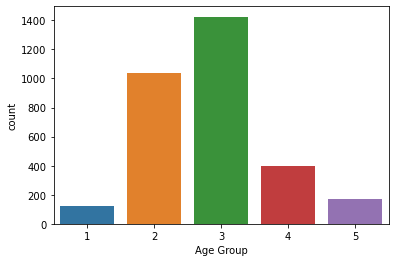

In [21]:
sns.countplot(train["Age Group"])

<AxesSubplot:xlabel='Tariff Plan', ylabel='count'>

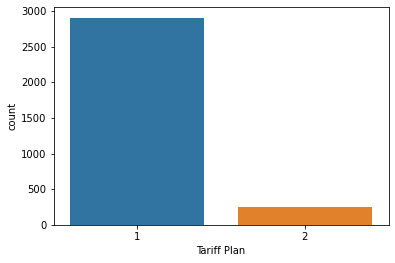

In [22]:
sns.countplot(train["Tariff Plan"])

<AxesSubplot:xlabel='Status', ylabel='count'>

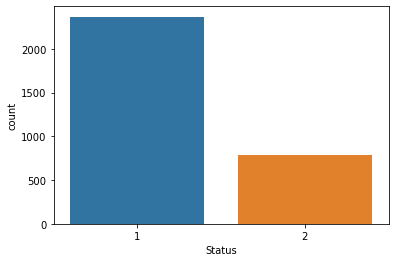

In [23]:
sns.countplot(train["Status"])

<AxesSubplot:xlabel='Age', ylabel='count'>

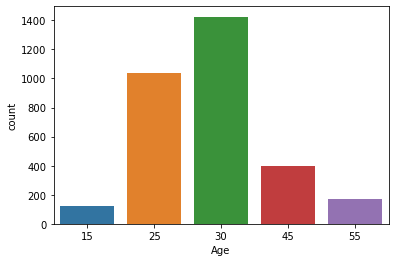

In [24]:
sns.countplot(train["Age"])

<AxesSubplot:xlabel='Customer Value', ylabel='count'>

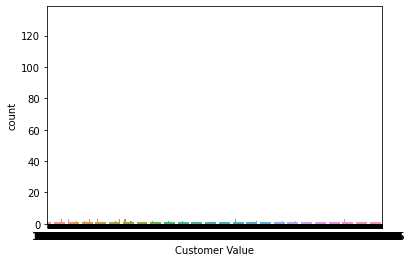

In [25]:
sns.countplot(train["Customer Value"])

<AxesSubplot:xlabel='Churn', ylabel='count'>

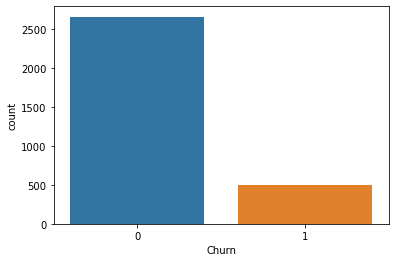

In [26]:
sns.countplot(train["Churn"])

<AxesSubplot:>

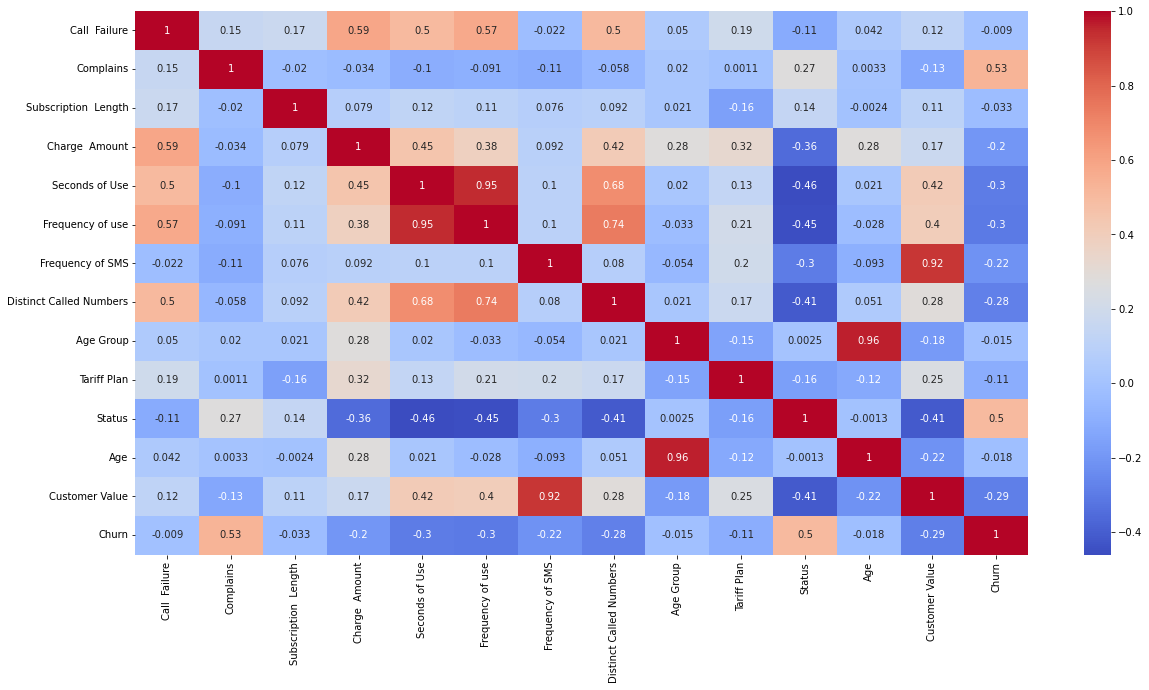

In [27]:
# Calculating the correlation matrix of numeric columns in 'train'
# Setting the size of the Matplotlib figure
# Creating a heatmap using Seaborn with annotations and a coolwarm color map
corr = train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [28]:
# Splitting the dataset into training and testing sets
# X_train: training features, X_test: testing features, y_train: training target, y_test: testing target
from sklearn.model_selection import train_test_split
y = train.Churn.to_frame()
X = train.drop(columns = ["Churn"])
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [29]:
#Let us augment the data now
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_sm , y_sm = sm.fit_resample(X, y)
y_sm.Churn.value_counts()

0    2655
1    2655
Name: Churn, dtype: int64

In [30]:
# Assuming X_sm and y_sm are modified or resampled versions of the original features and target
X_train_sm , X_test_sm , y_train_sm , y_test_sm = train_test_split(X_sm,y_sm, test_size = 0.3, random_state = 10)

In [31]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [32]:
# Creating a LazyClassifier instance with verbose set to 0 and ignore_warnings set to True
# Fitting LazyClassifier on the resampled training data
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train_sm, X_test_sm, y_train_sm, y_test_sm)
models

100%|██████████| 29/29 [00:14<00:00,  2.07it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.98,0.98,0.98,0.98,0.86
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.80
LGBMClassifier,0.97,0.97,0.97,0.97,0.37
BaggingClassifier,0.97,0.97,0.97,0.97,0.28
LabelSpreading,0.96,0.96,0.96,0.96,2.13
LabelPropagation,0.96,0.96,0.96,0.96,1.62
KNeighborsClassifier,0.95,0.95,0.95,0.95,0.20
DecisionTreeClassifier,0.95,0.95,0.95,0.95,0.07
ExtraTreeClassifier,0.94,0.94,0.94,0.94,0.05


In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine

In [34]:
# Training the XGBoost model on the resampled training data
# Making predictions on the resampled testing data
# Calculating the confusion matrix
# Calculating the accuracy score
xgb = XGBClassifier()
xgb.fit(X_train_sm, y_train_sm)
y_predxgb = xgb.predict(X_test_sm)
cmrf = confusion_matrix(y_test_sm, y_predxgb)
accrf = accuracy_score(y_test_sm, y_predxgb)
cmrf , accrf

(array([[707,  84],
        [ 22, 780]], dtype=int64),
 0.933458882611425)

In [35]:
#Checking the AUC value for XGB
y_score = xgb.predict_proba(X_test_sm)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_sm, y_score)
print('roc_auc_score for XGB: ', roc_auc_score(y_test_sm, y_score))

roc_auc_score for XGB:  0.9810626720178062


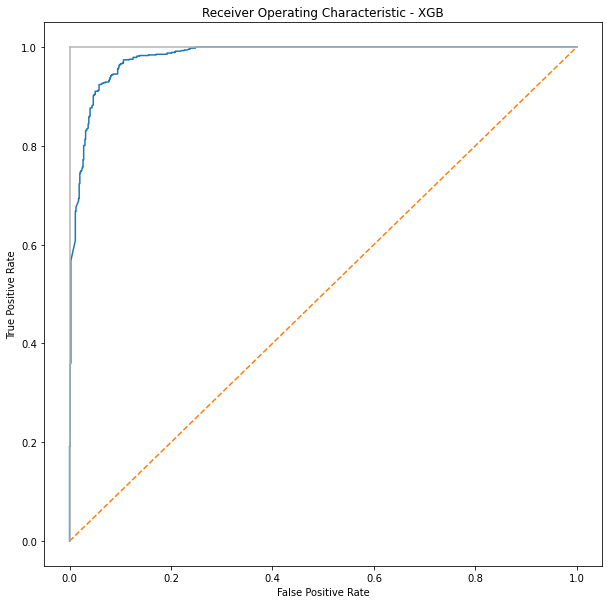

In [36]:
#Plotting the ROC curve for xgb
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGB')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
fi = xgb.feature_importances_

In [38]:
feature_cols = X_test_sm.columns
importance = pd.DataFrame(
    {"feature": feature_cols, "importance": xgb.feature_importances_}
)

<AxesSubplot:xlabel='feature'>

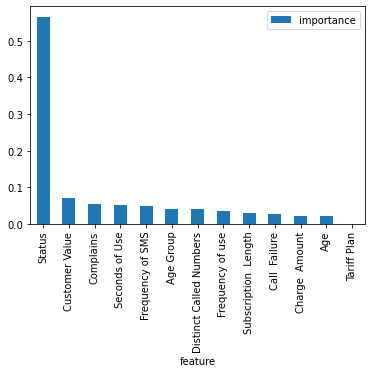

In [39]:
# Creating a DataFrame to store feature importance
# Sorting the DataFrame by importance in descending order
# Plotting the top 20 features and their importance
importance = pd.DataFrame(
    {"feature": feature_cols[:], "importance": xgb.feature_importances_[:]}
)
importance.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)
importance[:20].plot(x="feature", y="importance", kind="bar")

In [40]:
# Training the RandomForestClassifier model on the resampled training data
# Making predictions on the resampled testing data
# Calculating the confusion matrix
# Calculating the accuracy score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)
y_predrf = rf.predict(X_test_sm)
cmrf = confusion_matrix(y_test_sm, y_predrf)
accrf = accuracy_score(y_test_sm, y_predrf)
cmrf , accrf

(array([[760,  31],
        [ 10, 792]], dtype=int64),
 0.9742623979912115)

In [41]:
#Checking the AUC value for Randomforest
y_score = rf.predict_proba(X_test_sm)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_sm, y_score)
print('roc_auc_score for RandomForest: ', roc_auc_score(y_test_sm, y_score))

roc_auc_score for RandomForest:  0.9925399837952528


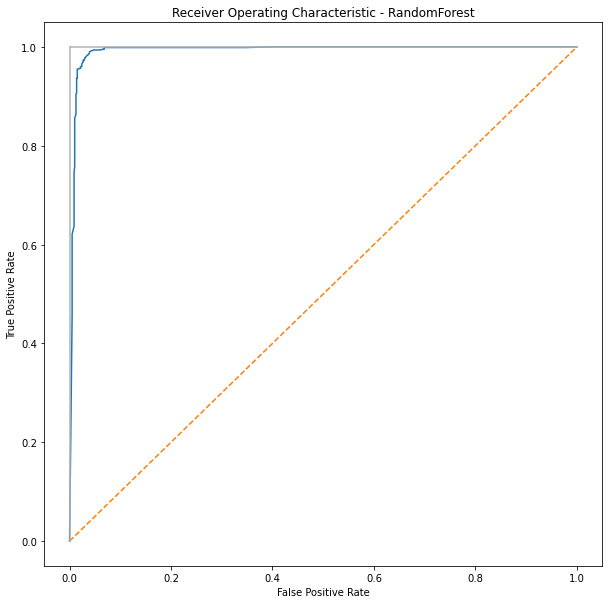

In [42]:
#Plotting the ROC curve for RandomForest
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
fi = rf.feature_importances_

In [44]:
feature_cols = X_test_sm.columns
importance = pd.DataFrame(
    {"feature": feature_cols, "importance": rf.feature_importances_}
)

<AxesSubplot:xlabel='feature'>

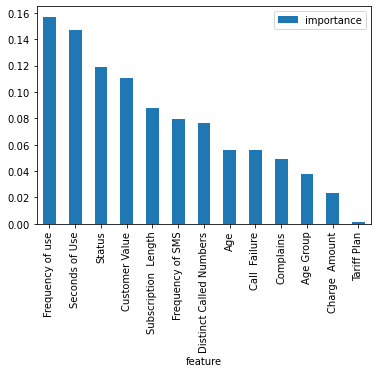

In [45]:
# Creating a DataFrame to store feature importance
# Sorting the DataFrame by importance in descending order
# Plotting the top 20 features and their importanceimportance = pd.DataFrame(
    {"feature": feature_cols[:], "importance": rf.feature_importances_[:]}
)
importance.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)
importance[:20].plot(x="feature", y="importance", kind="bar")

In [46]:
# Training the DecisionTreeClassifier model on the resampled training data
# Making predictions on the resampled testing data
# Calculating the confusion matrix
# Calculating the accuracy score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_sm, y_train_sm)
y_predrf = dtc.predict(X_test_sm)
cmrf = confusion_matrix(y_test_sm, y_predrf)
accrf = accuracy_score(y_test_sm, y_predrf)
cmrf , accrf

(array([[751,  40],
        [ 38, 764]], dtype=int64),
 0.9510357815442562)

In [47]:
#Checking the AUC value for DecisionTreeClassifier
y_score = dtc.predict_proba(X_test_sm)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_sm, y_score)
print('roc_auc_score for DecisitionTreeClassifier: ', roc_auc_score(y_test_sm, y_score))

roc_auc_score for DecisitionTreeClassifier:  0.9552879810587311


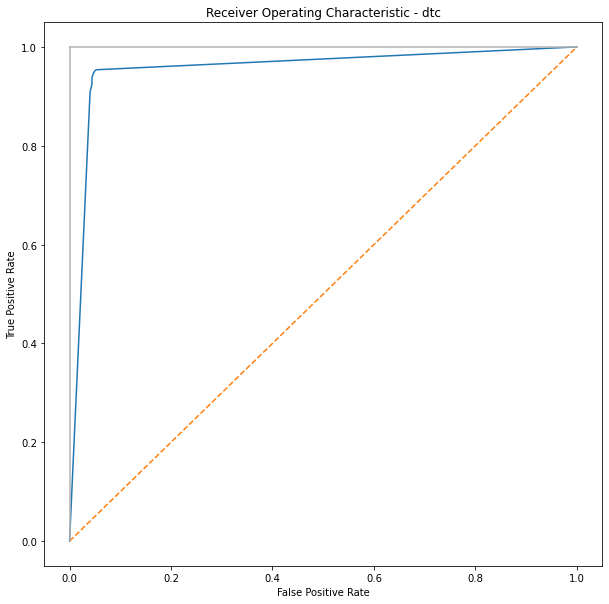

In [48]:
#Plotting the ROC curve for dtc
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - dtc')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
fi = dtc.feature_importances_

In [50]:
feature_cols = X_test_sm.columns
importance = pd.DataFrame(
    {"feature": feature_cols, "importance": dtc.feature_importances_}
)

<AxesSubplot:xlabel='feature'>

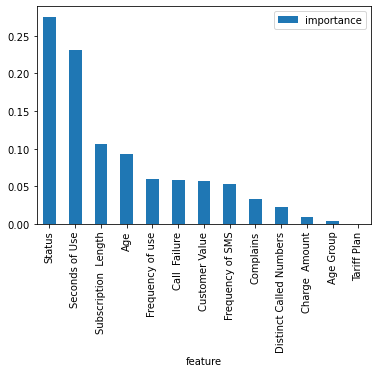

In [51]:
# Creating a DataFrame to store feature importance
# Sorting the DataFrame by importance in descending order
# Plotting the top 20 features and their importance
importance = pd.DataFrame(
    {"feature": feature_cols[:], "importance": dtc.feature_importances_[:]}
)
importance.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)
importance[:20].plot(x="feature", y="importance", kind="bar")

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# Training the KNeighborsClassifier model on the resampled training data
# Making predictions on the resampled testing data
# Calculating the confusion matrix
# Calculating the accuracy score
knn = KNeighborsClassifier()
knn.fit(X_train_sm, y_train_sm)
y_predrf = knn.predict(X_test_sm)
cmrf = confusion_matrix(y_test_sm, y_predrf)
accrf = accuracy_score(y_test_sm, y_predrf)
cmrf , accrf

(array([[624, 167],
        [ 28, 774]], dtype=int64),
 0.8775894538606404)

In [54]:
#Checking the AUC value for KNeighborsClassifier
y_score = knn.predict_proba(X_test_sm)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_sm, y_score)
print('roc_auc_score for KNeighborsClassifier: ', roc_auc_score(y_test_sm, y_score))

roc_auc_score for KNeighborsClassifier:  0.9475418596366227
